In [1]:
import pandas as pd
import mlflow
import matplotlib.pyplot as mplt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_file = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_file)

In [3]:
df.head()

,IdClient,Gen,InVarsta,Partener,Dependent,DurataClient,ServiciuTelefon,LiniiMultiple,ServiciuInternet,SecuritateOnline,...,ProtectieDispozitiv,SuportTehnic,StreamingTV,StreamingFilme,Contract,FacturareFaraHartie,MetodaPlata,TaxeLunar,TaxeTotal,Abandon
0,7590-VHVEG,Feminin,0,Da,Nu,1,Nu,Fara serviciu telefonic,DSL,Nu,...,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,29.85,29.85,Nu
1,5575-GNVDE,Masculin,0,Nu,Nu,34,Da,Nu,DSL,Da,...,Da,Nu,Nu,Nu,Un an,Nu,Cec trimis prin posta,56.95,1889.5,Nu
2,3668-QPYBK,Masculin,0,Nu,Nu,2,Da,Nu,DSL,Da,...,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec trimis prin posta,53.85,108.15,Da
3,7795-CFOCW,Masculin,0,Nu,Nu,45,Nu,Fara serviciu telefonic,DSL,Da,...,Da,Da,Nu,Nu,Un an,Nu,Transfer bancar (automat),42.30,1840.75,Nu
4,9237-HQITU,Feminin,0,Nu,Nu,2,Da,Nu,Fibra optica,Nu,...,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,70.70,151.65,Da


In [4]:
df.shape

(7039, 21)

In [5]:
df = df.drop(['IdClient'], axis = 1)
df.shape

(7039, 20)

In [6]:
df['TaxeTotal'] = pd.to_numeric(df.TaxeTotal, errors='coerce')
df.isnull().sum()

Gen                     0
InVarsta                0
Partener                0
Dependent               0
DurataClient            0
ServiciuTelefon         0
LiniiMultiple           0
ServiciuInternet        0
SecuritateOnline        0
PlanRezervaOnline       0
ProtectieDispozitiv     0
SuportTehnic            0
StreamingTV             0
StreamingFilme          0
Contract                0
FacturareFaraHartie     0
MetodaPlata             0
TaxeLunar               0
TaxeTotal              11
Abandon                 0
dtype: int64

In [7]:
df.drop(labels=df[df['DurataClient'] == 0].index, axis=0, inplace=True)
df[df['DurataClient'] == 0].index

Index([], dtype='int64')

In [8]:
df.fillna(df["TaxeTotal"].mean())

,Gen,InVarsta,Partener,Dependent,DurataClient,ServiciuTelefon,LiniiMultiple,ServiciuInternet,SecuritateOnline,PlanRezervaOnline,ProtectieDispozitiv,SuportTehnic,StreamingTV,StreamingFilme,Contract,FacturareFaraHartie,MetodaPlata,TaxeLunar,TaxeTotal,Abandon
0,Feminin,0,Da,Nu,1,Nu,Fara serviciu telefonic,DSL,Nu,Da,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,29.85,29.85,Nu
1,Masculin,0,Nu,Nu,34,Da,Nu,DSL,Da,Nu,Da,Nu,Nu,Nu,Un an,Nu,Cec trimis prin posta,56.95,1889.50,Nu
2,Masculin,0,Nu,Nu,2,Da,Nu,DSL,Da,Da,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec trimis prin posta,53.85,108.15,Da
3,Masculin,0,Nu,Nu,45,Nu,Fara serviciu telefonic,DSL,Da,Nu,Da,Da,Nu,Nu,Un an,Nu,Transfer bancar (automat),42.30,1840.75,Nu
4,Feminin,0,Nu,Nu,2,Da,Nu,Fibra optica,Nu,Nu,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,70.70,151.65,Da
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,Feminin,0,Nu,Nu,67,Da,Da,Fibra optica,Da,Da,Da,Nu,Da,Nu,Luna de luna,Da,Card de credit (automat),102.95,6886.25,Da
7035,Masculin,0,Nu,Nu,19,Da,Nu,Fibra optica,Nu,Nu,Nu,Nu,Da,Nu,Luna de luna,Da,Transfer bancar (automat),78.70,1495.10,Nu
7036,Feminin,0,Nu,Nu,12,Nu,Fara serviciu telefonic,DSL,Nu,Da,Da,Da,Da,Da,Un an,Nu,Cec electronic,60.65,743.30,Nu
7037,Feminin,0,Nu,Nu,72,Da,Nu,Nu,Fara serviciu de internet,Fara serviciu de internet,Fara serviciu de internet,Fara serviciu de internet,Fara serviciu de internet,Fara serviciu de internet,Doi ani,Da,Transfer bancar (automat),21.15,1419.40,Nu


In [9]:
df.isnull().sum()

Gen                    0
InVarsta               0
Partener               0
Dependent              0
DurataClient           0
ServiciuTelefon        0
LiniiMultiple          0
ServiciuInternet       0
SecuritateOnline       0
PlanRezervaOnline      0
ProtectieDispozitiv    0
SuportTehnic           0
StreamingTV            0
StreamingFilme         0
Contract               0
FacturareFaraHartie    0
MetodaPlata            0
TaxeLunar              0
TaxeTotal              0
Abandon                0
dtype: int64

In [10]:
df["InVarsta"]= df["InVarsta"].map({0: "Nu", 1: "Da"})
df.head()

,Gen,InVarsta,Partener,Dependent,DurataClient,ServiciuTelefon,LiniiMultiple,ServiciuInternet,SecuritateOnline,PlanRezervaOnline,ProtectieDispozitiv,SuportTehnic,StreamingTV,StreamingFilme,Contract,FacturareFaraHartie,MetodaPlata,TaxeLunar,TaxeTotal,Abandon
0,Feminin,Nu,Da,Nu,1,Nu,Fara serviciu telefonic,DSL,Nu,Da,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,29.85,29.85,Nu
1,Masculin,Nu,Nu,Nu,34,Da,Nu,DSL,Da,Nu,Da,Nu,Nu,Nu,Un an,Nu,Cec trimis prin posta,56.95,1889.50,Nu
2,Masculin,Nu,Nu,Nu,2,Da,Nu,DSL,Da,Da,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec trimis prin posta,53.85,108.15,Da
3,Masculin,Nu,Nu,Nu,45,Nu,Fara serviciu telefonic,DSL,Da,Nu,Da,Da,Nu,Nu,Un an,Nu,Transfer bancar (automat),42.30,1840.75,Nu
4,Feminin,Nu,Nu,Nu,2,Da,Nu,Fibra optica,Nu,Nu,Nu,Nu,Nu,Nu,Luna de luna,Da,Cec electronic,70.70,151.65,Da


In [11]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [12]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Gen,InVarsta,Partener,Dependent,DurataClient,ServiciuTelefon,LiniiMultiple,ServiciuInternet,SecuritateOnline,PlanRezervaOnline,ProtectieDispozitiv,SuportTehnic,StreamingTV,StreamingFilme,Contract,FacturareFaraHartie,MetodaPlata,TaxeLunar,TaxeTotal,Abandon
0,0,1,0,1,1,1,1,0,2,0,2,2,2,2,1,0,1,29.85,29.85,1
1,1,1,1,1,34,0,2,0,0,2,0,2,2,2,2,1,2,56.95,1889.50,1
2,1,1,1,1,2,0,2,0,0,0,2,2,2,2,1,0,2,53.85,108.15,0
3,1,1,1,1,45,1,1,0,0,2,0,0,2,2,2,1,3,42.30,1840.75,1
4,0,1,1,1,2,0,2,1,2,2,2,2,2,2,1,0,1,70.70,151.65,0


In [13]:
x = df.drop(columns = ['Abandon'])
y = df['Abandon'].values

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 40, stratify=y)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.333)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(4919, 19)
(4919,)
(1406, 19)
(1406,)
(703, 19)
(703,)


In [37]:
col_num = ["DurataClient", 'TaxeLunar', 'TaxeTotal']

scaler= StandardScaler()

x_train[col_num] = scaler.fit_transform(x_train[col_num])
x_test[col_num] = scaler.transform(x_test[col_num])
x_val[col_num] = scaler.transform(x_val[col_num])

In [38]:
def train(model, x_train, y_train): 
    model = model.fit(x_train, y_train) 
    
    train_acc = model.score(x_train, y_train) 
    mlflow.log_metric("train_acc", train_acc) 
    
    print(f"Train accuracy for {str(model).split('(')[0]}: {train_acc:.3%}")
    
def evaluate(model, x_test, y_test):
    eval_acc = model.score(x_test, y_test)
    
    preds = model.predict(x_test)
    auc_score = roc_auc_score(y_test, preds)
    
    mlflow.log_metric("eval_acc", eval_acc)
    mlflow.log_metric("auc_score", auc_score)
    
    print(f"-----------{str(model).split('(')[0]}-----------")
    print(f"Auc Score: {auc_score:.3%}")
    print(f"Eval Accuracy: {eval_acc:.3%}")

In [43]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
svc_model = SVC(gamma='auto', probability=True)
rf_model = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
lr_model = LogisticRegression()
ab_model = AdaBoostClassifier()
gb_model = GradientBoostingClassifier()

model_list = [knn_model, svc_model, rf_model, lr_model, ab_model, gb_model]

In [44]:
for model in model_list:
    train(model, x_train, y_train)

Train accuracy for KNeighborsClassifier: 81.297%
Train accuracy for SVC: 80.382%
Train accuracy for RandomForestClassifier: 81.236%
Train accuracy for LogisticRegression: 79.854%
Train accuracy for AdaBoostClassifier: 80.545%
Train accuracy for GradientBoostingClassifier: 82.923%


In [45]:
for model in model_list:
    evaluate(model, x_test, y_test)

-----------KNeighborsClassifier-----------
Auc Score: 69.095%
Eval Accuracy: 77.240%
-----------SVC-----------
Auc Score: 68.767%
Eval Accuracy: 80.156%
-----------RandomForestClassifier-----------
Auc Score: 69.232%
Eval Accuracy: 80.085%
-----------LogisticRegression-----------
Auc Score: 72.189%
Eval Accuracy: 80.654%
-----------AdaBoostClassifier-----------
Auc Score: 71.686%
Eval Accuracy: 80.797%
-----------GradientBoostingClassifier-----------
Auc Score: 69.921%
Eval Accuracy: 79.587%


In [46]:
colors = ['r', 'b', 'g', 'm', 'y', 'black']

def roc_curve_plot(model_list, x_test, y_test):
    mplt.plot([0, 1], [0, 1], 'k--' )
    i = 0
    for model in model_list:
        y_pred_prob = model.predict_proba(x_test)[:,1]
        preds = model.predict(x_test)
    
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
        mplt.plot(fpr, tpr, label=str(model).split('(')[0], color = colors[i])
        mplt.legend(loc='lower right')
        i += 1
        
    mplt.xlabel('False Positive Rate')
    mplt.ylabel('True Positive Rate')
    mplt.title('Curba ROC', fontsize=16)
    mplt.savefig("roc_plot.png")
    mplt.show()
    
    mlflow.log_artifact("roc_plot.png")

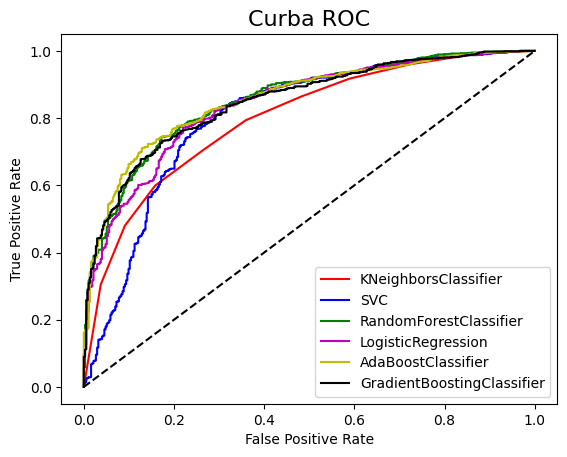

In [47]:
roc_curve_plot(model_list, x_test, y_test)

In [48]:
from sklearn.ensemble import VotingClassifier
estimator = [('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression()), ('abc', AdaBoostClassifier())]
eclf1 = VotingClassifier(estimators=estimator, voting='soft')
eclf1.fit(x_train, y_train)
predictions = eclf1.predict(x_test)
auc_score = roc_auc_score(y_test, predictions)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
print("Final AUC Score ")
print(auc_score)

Final Accuracy Score 
0.8008534850640113
Final AUC Score 
0.7077410597728057


In [49]:
def roc_curve_model(model, x_test, y_test):
    mplt.plot([0, 1], [0, 1], 'k--' )
    y_pred_prob = model.predict_proba(x_test)[:,1]
    preds = model.predict(x_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    mplt.plot(fpr, tpr, label=str(model).split('(')[0], color = 'r')
    mplt.legend(loc='lower right')
        
    mplt.xlabel('False Positive Rate')
    mplt.ylabel('True Positive Rate')
    mplt.title('Curba ROC', fontsize=16)
    mplt.savefig(str(model).split('(')[0]+"_roc_plot.png")
    mplt.show()
    
    mlflow.log_artifact(str(model).split('(')[0]+"_roc_plot.png")

def conf_matrix(model, x_test, y_test):
    preds = model.predict(x_test)
    
    conf_matrix = confusion_matrix(y_test, preds)
    ax = sn.heatmap(conf_matrix, annot=True, fmt='d')
    ax.invert_xaxis()
    ax.invert_yaxis()
    mplt.ylabel('Actual')
    mplt.xlabel('Predicted')
    mplt.title("Confusion Matrix")
    mplt.savefig(str(model).split('(')[0]+"_conf_matrix.png")
    
    mlflow.log_artifact(str(model).split('(')[0]+"_conf_matrix.png")

Train accuracy for KNeighborsClassifier: 81.297%
-----------KNeighborsClassifier-----------
Auc Score: 69.095%
Eval Accuracy: 77.240%


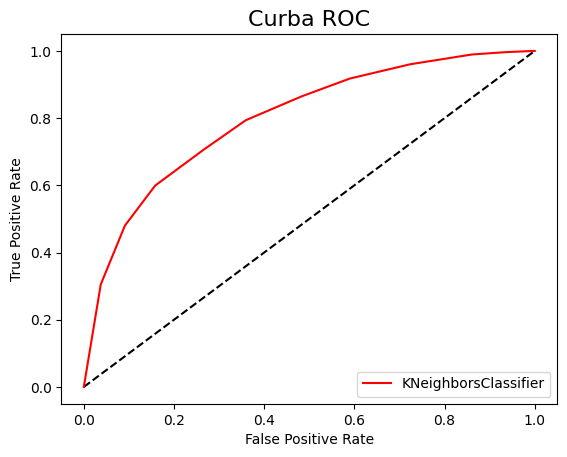

Model run:  054a457a00244f32a1e8ed2b547555a8


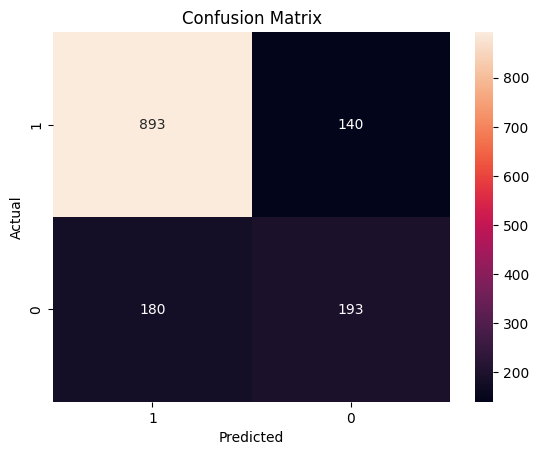

In [65]:
model = knn_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

Train accuracy for SVC: 80.382%
-----------SVC-----------
Auc Score: 68.767%
Eval Accuracy: 80.156%


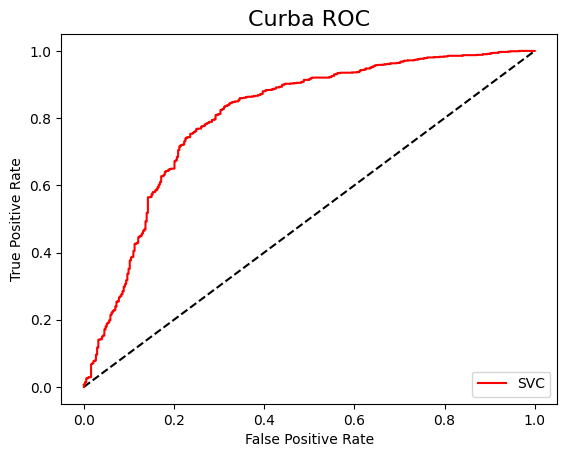

Model run:  8c05321d62eb4a5e83d429260e3b21c3


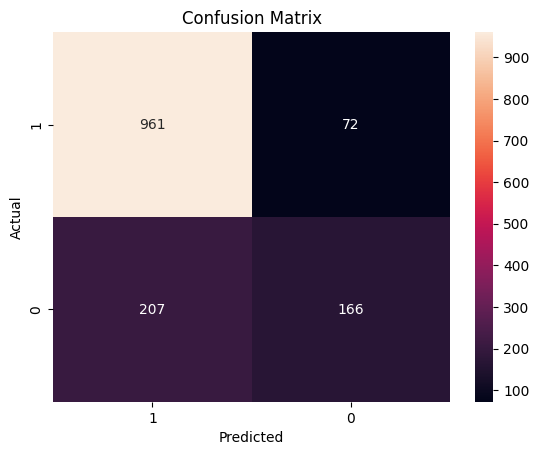

In [66]:
model = svc_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

Train accuracy for RandomForestClassifier: 81.236%
-----------RandomForestClassifier-----------
Auc Score: 69.232%
Eval Accuracy: 80.085%


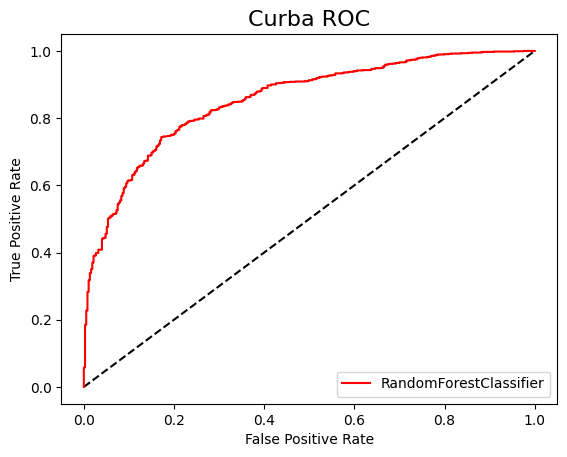

Model run:  c4f6e215e16d4f72870cea7b2825c148


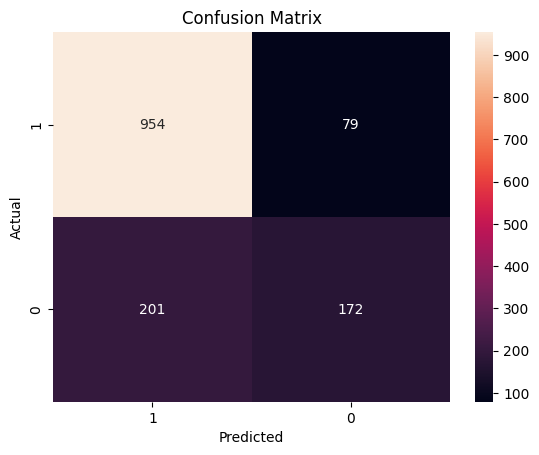

In [67]:
model = rf_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

Train accuracy for LogisticRegression: 79.854%
-----------LogisticRegression-----------
Auc Score: 72.189%
Eval Accuracy: 80.654%


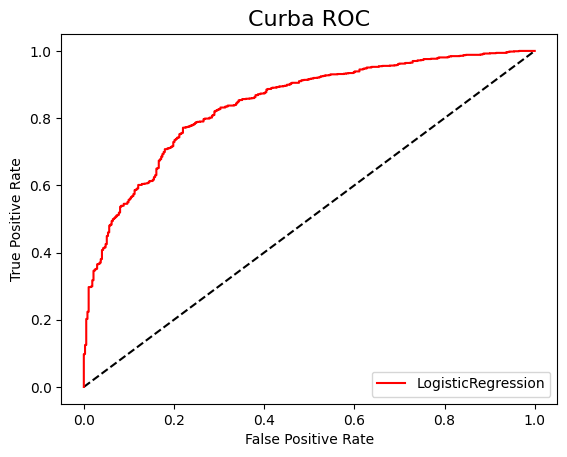

Model run:  8ff0b30c6f7b46a1a21e3e2d0f215210


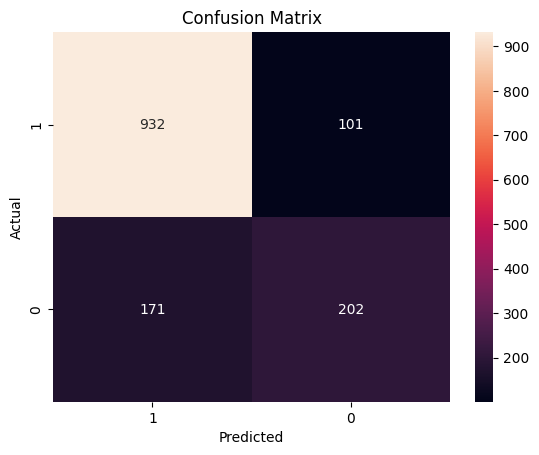

In [70]:
model = lr_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

In [71]:
from sklearn.model_selection import cross_val_score
import numpy as np

acc = cross_val_score(lr_model, x_val, y_val, scoring="roc_auc", cv=10)
i = 0
for el in acc:
    mlflow.log_metric("eval_acc_"+str(i), el)
    i+=1
mlflow.log_metric("mean_eval_acc", np.mean(acc))

Train accuracy for AdaBoostClassifier: 80.545%
-----------AdaBoostClassifier-----------
Auc Score: 71.686%
Eval Accuracy: 80.797%


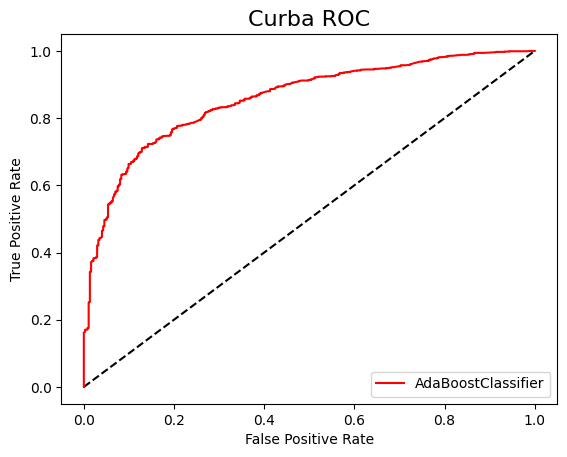

Model run:  7409ed4cffcd4dc9b2b7f94aeb8a1ef1


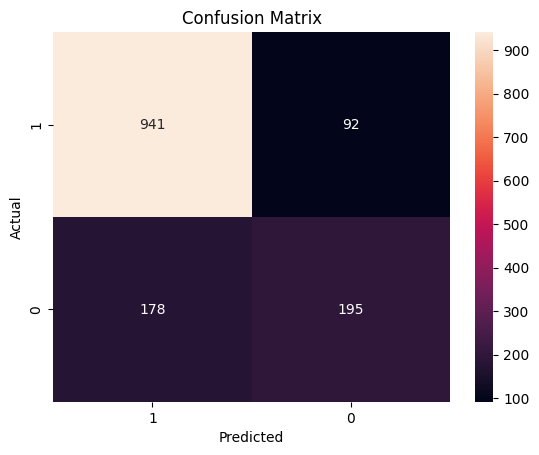

In [68]:
model = ab_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

Train accuracy for GradientBoostingClassifier: 82.923%
-----------GradientBoostingClassifier-----------
Auc Score: 69.921%
Eval Accuracy: 79.587%


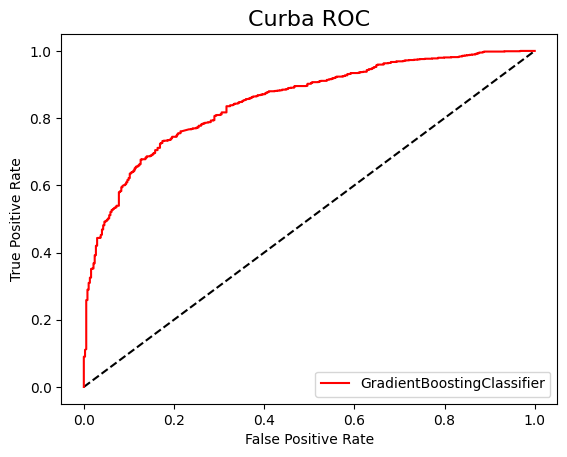

Model run:  23173ae55a3b41febf053ed8b2894ee2


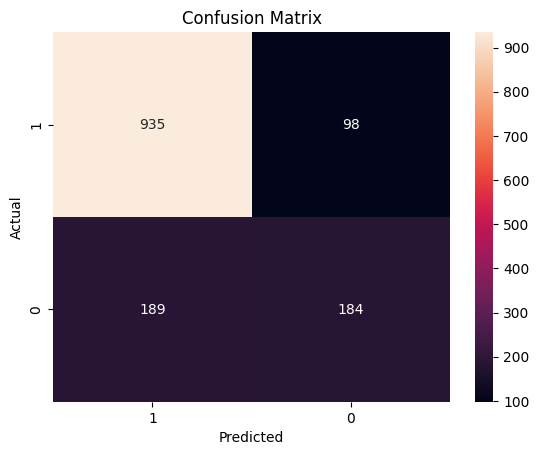

In [69]:
model = gb_model
mlflow.set_experiment(str(model).split('(')[0]+"_experiment")
with mlflow.start_run(): 
    train(model, x_train, y_train) 
    evaluate(model, x_test, y_test) 
    roc_curve_model(model, x_test, y_test)
    conf_matrix(model, x_test, y_test)
    mlflow.sklearn.log_model(model, "log_reg_model") 
    print("Model run: ", mlflow.active_run().info.run_uuid) 
    mlflow.end_run()

In [80]:
#mlflow server --backend-store-uri sqlite:///mlflow.db
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("LogisticRegressionv2")

2023/06/15 00:13:33 INFO mlflow.tracking.fluent: Experiment with name 'LogisticRegressionv2' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/LENOVO/Desktop/Licenta_Alin/Notebook/mlruns/1', creation_time=1686777213789, experiment_id='1', last_update_time=1686777213789, lifecycle_stage='active', name='LogisticRegressionv2', tags={}>

In [93]:
def test_model(name, stage, x_test, y_test):
    model = mlflow.pyfunc.load_model(f"models:/{name}/{stage}")
    y_pred = model.predict(X_test)
    return {"rmse": mean_squared_error(y_test, y_pred, squared=False)}

test_model(name=model_name, stage="Production", X_test=test_x, y_test=test_y)